<a href="https://colab.research.google.com/github/ayoubamazian/NLP/blob/main/SkimLit_Project_With_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The goal of this dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.** 
>We will be replicating this deep learning model from this paper https://arxiv.org/abs/1710.06071

### **extracting data from the gitHub and getting familiar with it**



In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
#start our experiment using PubMed_20k_RCT_numbers_replaced_with_at_sign

data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [3]:
import os

file_names = [data_dir + filename for filename in os.listdir(data_dir)]
file_names

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [4]:
def get_lines(filename):
  with open(filename, "r") as file:
    return file.readlines()

In [5]:
lines = get_lines(data_dir+"train.txt")
lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
len(lines)

210040

### **Preparing the data**

In [7]:
def preprocess_text(filename):
  input_line = get_lines(filename)
  # abstract_lines = ''
  abstract_samples = []

  for line in input_line:
    if line.startswith("###"):
      abstract_lines = ''
    elif line.isspace():
      abstract_split = abstract_lines.splitlines() #The splitlines() method splits a string into a list. The splitting is done at line breaks.
                                                   #splitlines() == split("\n")
      for num_line, abstract_line in enumerate(abstract_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["num_line"] = num_line
        line_data["total_lines"] = len(abstract_split)
        abstract_samples.append(line_data)
    else:
      abstract_lines += line  
  return  abstract_samples

In [8]:
train_samples = preprocess_text(data_dir+"train.txt")
test_samples = preprocess_text(data_dir+"test.txt")
dev_samples = preprocess_text(data_dir+"dev.txt")

In [9]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
dev_df = pd.DataFrame(dev_samples)

len(train_df), len(test_df), len(dev_df)

(180040, 30135, 30212)

In [10]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

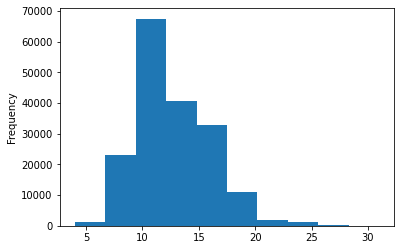

In [11]:
train_df.total_lines.plot.hist()

In [12]:
train_sentences = train_df["text"].tolist()
test_sentences = test_df["text"].tolist()
dev_sentences = dev_df["text"].tolist()

train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [13]:
len(train_sentences)

180040

In [14]:
#Encode labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df["target"].to_numpy())
y_test = label_encoder.fit_transform(test_df["target"].to_numpy())
y_dev = label_encoder.fit_transform(dev_df["target"].to_numpy())

y_train.shape

(180040,)

In [15]:
#One_hot labels

from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(sparse=False) #we want none-sparse matrix because it does not fit with tensorflow
y_train_one = one.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
y_test_one = one.fit_transform(test_df["target"].to_numpy().reshape(-1,1))
y_dev_one = one.fit_transform(dev_df["target"].to_numpy().reshape(-1,1))

y_train_one[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [16]:
num_classes = len(label_encoder.classes_)
name_classes = label_encoder.classes_
num_classes, name_classes

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

**Model_0:Naive_bais**

1.   MultinomialNB
2.   ComplementNB
3.   BernouliNB



In [17]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [18]:
# MultinomialNB

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("GNB", MultinomialNB())
])

model_0.fit(train_sentences, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('GNB', MultinomialNB())])

In [19]:
score = model_0.score(dev_sentences, y_dev)
score

0.7218323844829869

In [20]:
y_pred_0 = model_0.predict(test_sentences)

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-11-28 19:54:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-28 19:54:03 (63.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [22]:
#ComplementNB
model_0_c = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("GNB", ComplementNB())
])

model_0_c.fit(train_sentences, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('GNB', ComplementNB())])

In [23]:
model_0_c.score(dev_sentences, y_dev)

0.7370250231696015

In [24]:
#BernoulliNB
model_0_b = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("GNB", BernoulliNB())
])

model_0_b.fit(train_sentences, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('GNB', BernoulliNB())])

In [25]:
model_0_b.score(test_sentences, y_test)

0.7599800895968143

In [26]:
from helper_functions import calculate_results

y_pred_0_b = model_0_b.predict(dev_sentences)

model_0_b_result = calculate_results(y_dev, y_pred_0_b)
model_0_b_result

{'accuracy': 76.592082616179,
 'precision': 0.7645818346926345,
 'recall': 0.76592082616179,
 'f1': 0.7648629994981836}

### **Preparing our deep learning model**

*   Vectorization
*   Embedding


In [27]:
import numpy as np
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_len = np.average(sent_len)
avg_len

26.338269273494777

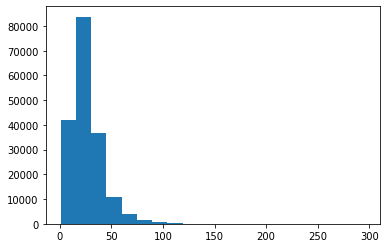

In [28]:
import matplotlib.pyplot as plt

plt.hist(sent_len, bins=20);

In [29]:
len_sen = int(np.percentile(sent_len, 95));
len_sen

55

In [30]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [31]:
text_vectorizer = TextVectorization(max_tokens=68000, # this number was taking from the paper
                                    output_sequence_length=len_sen)

text_vectorizer.adapt(train_sentences)

embeding = Embedding(input_dim=68000,
                     output_dim=128,
                     mask_zero=True,
                     input_length= len_sen)

In [32]:
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

### **Making our data faster using:**

*   tensor slices
*   batch() and prefetch()



In [33]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, y_test))
dev_dataset = tf.data.Dataset.from_tensor_slices((dev_sentences, y_dev))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [34]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
dev_dataset = dev_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### **Model_1: CONV1D with token embedding**

In [35]:
from tensorflow.keras import layers

In [36]:
inputs = layers.Input(shape=(1,), dtype = tf.string)
text_vec = text_vectorizer(inputs)
emb = embeding(text_vec)
x = layers.Conv1D(64, kernel_size=5, activation="relu", padding="same")(emb)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_CONV1D')

model_1.compile(loss="sparse_categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "model_1_CONV1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)              

In [37]:
history_model_1 = model_1.fit(train_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.5*len(train_dataset)),
                              validation_data=test_dataset,
                              validation_steps=int(0.1*len(test_dataset))) 

Epoch 1/3
2813/2813 [==============================] - 36s 10ms/step - loss: 0.6765 - accuracy: 0.7504 - val_loss: 0.5496 - val_accuracy: 0.8012
Epoch 2/3
2813/2813 [==============================] - 28s 10ms/step - loss: 0.5537 - accuracy: 0.8034 - val_loss: 0.5242 - val_accuracy: 0.8088
Epoch 3/3
   1/2813 [..............................] - ETA: 2:37 - loss: 0.7261 - accuracy: 0.7500

2813/2813 [==============================] - 1s 212us/step - loss: 0.7261 - accuracy: 0.7500 - val_loss: 0.5251 - val_accuracy: 0.8092


In [38]:
model_1.evaluate(test_dataset)

942/942 [==============================] - 3s 4ms/step - loss: 0.5479 - accuracy: 0.8041


[0.5479120016098022, 0.804114818572998]

In [39]:
y_pred_1 = tf.argmax(model_1.predict(dev_sentences), axis=1)
y_pred_1[:10] 

945/945 [==============================] - 3s 2ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 2, 4, 2, 4, 1])>

In [40]:
model_1_results = calculate_results(y_dev, y_pred_1)
model_1_results

{'accuracy': 80.9082483781279,
 'precision': 0.8064024866292276,
 'recall': 0.809082483781279,
 'f1': 0.8055150306244057}

### **Mosdel_2: Pretrained Model from Tensorflow_hub**

In [41]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="USE")

In [42]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_emb = sentence_encoder_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_emb)
outputs = layers.Dense(5, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_USE")

model_2.compile(loss="sparse_categorical_crossentropy", # if your labels are one hot encoded use categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "model_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [43]:
history_model_2 = model_2.fit(train_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.5*len(train_dataset)),
                              validation_data=test_dataset,
                              validation_steps=int(0.1*len(test_dataset))
                              ) 

Epoch 1/3
2813/2813 [==============================] - 36s 11ms/step - loss: 0.7767 - accuracy: 0.7017 - val_loss: 0.7171 - val_accuracy: 0.7231
Epoch 2/3
2813/2813 [==============================] - 37s 13ms/step - loss: 0.6828 - accuracy: 0.7402 - val_loss: 0.6638 - val_accuracy: 0.7457
Epoch 3/3
   1/2813 [..............................] - ETA: 41s - loss: 0.7989 - accuracy: 0.6250

2813/2813 [==============================] - 1s 324us/step - loss: 0.7989 - accuracy: 0.6250 - val_loss: 0.6639 - val_accuracy: 0.7473


In [44]:
model_2.evaluate(test_dataset)

942/942 [==============================] - 11s 11ms/step - loss: 0.6730 - accuracy: 0.7425


[0.6730337142944336, 0.7425252795219421]

In [45]:
y_pred_2 = tf.argmax(model_2.predict(dev_sentences), axis=1)
y_pred_2[:10] 

945/945 [==============================] - 11s 12ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 0, 2, 4, 4, 2, 2, 4, 1])>

In [46]:
model_2_results = calculate_results(y_dev, y_pred_2)
model_2_results

{'accuracy': 74.83781278962002,
 'precision': 0.7438266113285281,
 'recall': 0.7483781278962002,
 'f1': 0.7435818778589849}

### **Model_3:Conv1D with character embedding**



In [47]:
def split_chars(text):
  return " ".join(list(text))

In [48]:
split_chars(train_sentences[1])

'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .'

In [49]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
dev_chars = [split_chars(sentence) for sentence in dev_sentences]

train_chars[:3]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [50]:
char_len = [len(sentence) for sentence in train_sentences]
mean_char_lens = np.mean(char_len)
mean_char_lens

149.3662574983337

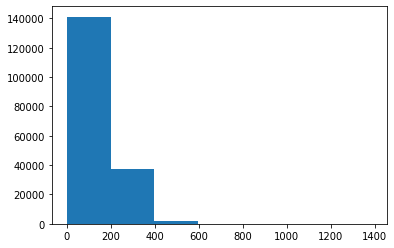

In [51]:
plt.hist(char_len, bins=7);

In [52]:
seq_len = int(np.percentile(char_len, 95))
seq_len

290

In [54]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=seq_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [57]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [58]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

In [69]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [70]:
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1500      
                                                                 
 conv1d_5 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 5

In [71]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)
dev_char_dataset = tf.data.Dataset.from_tensor_slices((dev_chars, y_dev)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [72]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.5 * len(train_char_dataset)),
                              epochs=3)

Epoch 1/3
2813/2813 [==============================] - 16s 5ms/step - loss: 0.9836 - accuracy: 0.6109
Epoch 2/3
2813/2813 [==============================] - 19s 7ms/step - loss: 0.8034 - accuracy: 0.6907
Epoch 3/3
   1/2813 [..............................] - ETA: 1:29 - loss: 1.0267 - accuracy: 0.5000

2813/2813 [==============================] - 0s 10us/step - loss: 1.0267 - accuracy: 0.5000


In [73]:
model_3.evaluate(test_char_dataset)

942/942 [==============================] - 5s 4ms/step - loss: 0.7914 - accuracy: 0.6943


[0.7913553714752197, 0.6943421363830566]

### **Modele 4: Bidirectional LSTM with token embedding**

In [91]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embeding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(5, activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectionel")

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
model_4.summary()

Model: "model_4_Bidirectionel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 5)                 645       
                                                                 
Total params: 8,803,461
Trainable params: 8,8

In [92]:
model_4_history = model_4.fit(train_dataset,
                              steps_per_epoch=int(0.3 * len(train_char_dataset)),
                              epochs=3)

Epoch 1/3
1688/1688 [==============================] - 48s 24ms/step - loss: 0.4840 - accuracy: 0.8234
Epoch 2/3
1688/1688 [==============================] - 43s 25ms/step - loss: 0.4358 - accuracy: 0.8439
Epoch 3/3
1688/1688 [==============================] - 48s 28ms/step - loss: 0.4158 - accuracy: 0.8505


In [93]:
model_4.evaluate(test_dataset)

942/942 [==============================] - 15s 12ms/step - loss: 0.5155 - accuracy: 0.8138


[0.5154519081115723, 0.813804566860199]

In [94]:
y_pred_4 = tf.argmax(model_4.predict(dev_dataset), axis=1)
y_pred_4[:10] 

945/945 [==============================] - 10s 8ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 0, 2, 4, 4, 2, 2, 4, 1])>

In [95]:
# The best Model So far
model_4_results = calculate_results(y_dev, y_pred_4)
model_4_results

{'accuracy': 81.89130146961472,
 'precision': 0.8233291667381545,
 'recall': 0.8189130146961472,
 'f1': 0.8145069218169505}

### **Model 5: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)**

In [99]:
#Create token model
token_input = layers.Input(shape=[], dtype=tf.string)
token_vector =  sentence_encoder_layer(token_input)
token_dense = layers.Dense(128, activation="relu")(token_vector)
token_model = tf.keras.Model(token_input, token_dense)

#Create char model
char_input = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(char_input)
char_embeddings = char_embed(char_vectors)
char_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(char_input, char_lstm)

#Concatanate the models 
token_char_combine = layers.Concatenate(name="token_char_concate")([token_model.output,
                                                                     char_model.output])

#Create Output layers
dropout_1 = layers.Dropout(0.5)(token_char_combine) # They used DropOut in the paper
combined_dense = layers.Dense(200, activation="relu")(dropout_1)
dropout_2 = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(dropout_2)

#Create The model
model_5 = tf.keras.Model(inputs = [token_model.input,char_model.input],
                         outputs = output_layer,
                         name="model_4_token_and_char_embeddings")

model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
model_5.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_20[0][0]']               
 tion)                                                                                            
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   [

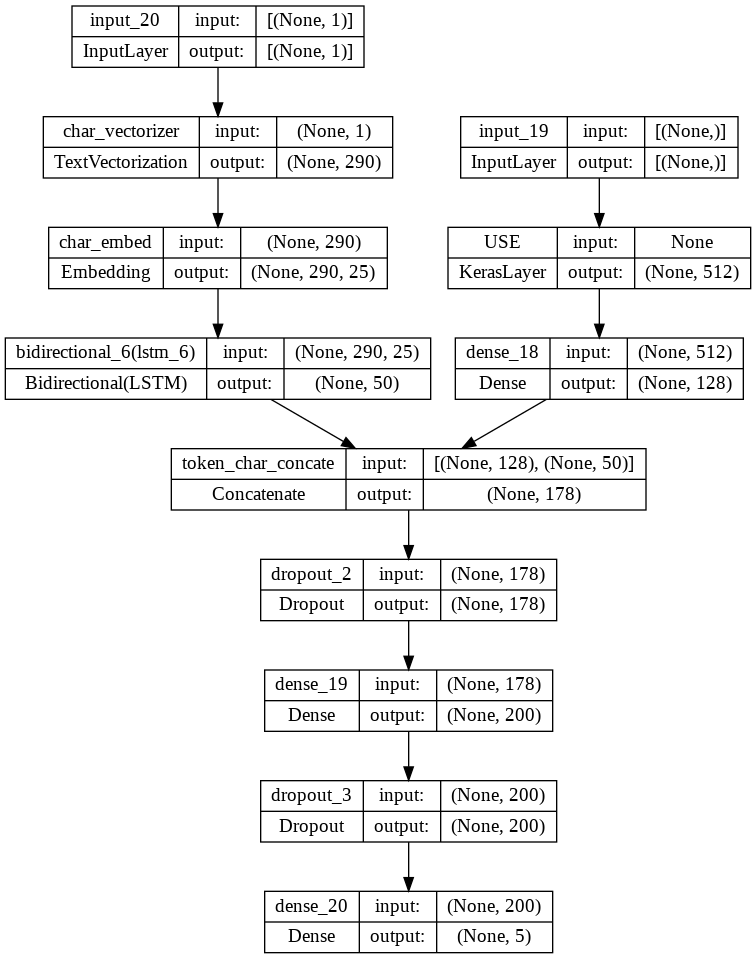

In [101]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_5,show_shapes=True)

In [102]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(y_train)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_labels))
train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_token_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(y_test)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_data, test_token_char_labels))
test_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

dev_token_char_data = tf.data.Dataset.from_tensor_slices((dev_sentences, dev_chars))
dev_token_char_labels = tf.data.Dataset.from_tensor_slices(y_dev)
dev_token_char_dataset = tf.data.Dataset.zip((dev_token_char_data, dev_token_char_labels))
dev_token_char_dataset = dev_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_token_char_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [103]:
model_5_history = model_5.fit(train_token_char_dataset,
                              steps_per_epoch=int(0.3 * len(train_token_char_dataset)),
                              epochs=3)

Epoch 1/3
1688/1688 [==============================] - 63s 35ms/step - loss: 0.8420 - accuracy: 0.6737
Epoch 2/3
1688/1688 [==============================] - 59s 35ms/step - loss: 0.7354 - accuracy: 0.7197
Epoch 3/3
1688/1688 [==============================] - 52s 31ms/step - loss: 0.7018 - accuracy: 0.7334


In [105]:
y_pred_5 = tf.argmax(model_5.predict(dev_token_char_dataset), axis=1)
y_pred_5[:10] 

945/945 [==============================] - 20s 20ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 0, 2, 2, 2, 2, 2, 4, 1])>

In [106]:
model_5_results = calculate_results(y_dev, y_pred_5)
model_5_results

{'accuracy': 75.79438633655501,
 'precision': 0.763293583504699,
 'recall': 0.7579438633655501,
 'f1': 0.7525632767823732}

### **Model 6: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings**